In [170]:
import math as math

import numpy as np

In [171]:
data = np.genfromtxt('data_class10.csv', delimiter=',')

print(data.shape)
n = data.shape[0]

(1200, 2)


In [172]:
k = 6

In [173]:
# Option 1
# Takes 6 random index from the dataset
# center_idx = np.random.choice(n, k, replace=False)
# 
# centers = list()

# for i in center_idx:
#     centers.append(data[i].tolist())

In [174]:
# Option 2
centers = data[np.random.choice(n, k, replace=False)]

In [175]:
print(centers)

[[14.27715775  5.72279899]
 [12.02960607  6.71923092]
 [ 0.79712532  7.94794001]
 [13.26327678  5.2212936 ]
 [ 0.43456194  2.65372575]
 [ 0.92059818  1.14526648]]


In [176]:
def calc_distance(a, b):
    distance = 0
    for x1, x2 in zip(a, b):
        distance += (x1 - x2) ** 2
    return math.sqrt(distance)

In [177]:
for s in data:
    idx = -1
    min = 999
    for i, c in enumerate(centers):
        distance = calc_distance(s, c)
        if min > distance:
            min = distance
            idx = i

In [178]:
data[0]

array([0.20987452, 2.00290685])

In [179]:
centers[0]

array([14.27715775,  5.72279899])

In [180]:
data[0] - centers[0]

array([-14.06728323,  -3.71989214])

In [181]:
math.sqrt(((data[0] - centers[0]) ** 2).sum())

14.550809428478914

In [182]:
math.sqrt(((data[0] - centers[1]) ** 2).sum())

12.72594856290028

In [183]:
(data-centers[0]).shape

(1200, 2)

In [184]:
(data-centers[0]) ** 2

array([[197.88845749,  13.83759753],
       [152.56926384,  15.52744411],
       [179.34022201,  31.15201232],
       ...,
       [  0.20633633,   0.92919671],
       [  1.15572722,   2.24821385],
       [  2.97050858,   0.89293011]])

In [185]:
((data-centers[0]) ** 2).sum(axis=1) ** 0.5

array([14.55080943, 12.96521145, 14.5083505 , ...,  1.06561393,
        1.84497726,  1.9655632 ])

In [186]:
distance = np.zeros((n, k))

for i in range(k):
    # Center to distance
    distance[:,i] = ((data-centers[i]) ** 2).sum(axis=1) ** 0.5

In [198]:
type(distance)

numpy.ndarray

In [199]:
distance

array([[14.55080943, 12.72594856,  5.97396709, 13.44430451,  0.68851266,
         1.11385597],
       [12.96521145, 11.24592783,  6.26798828, 11.84808507,  1.7267188 ,
         1.18961364],
       [14.5083505 , 12.94071314,  7.80703844, 13.37976523,  2.55244968,
         1.00448452],
       ...,
       [ 1.06561393,  2.65688707, 13.41049935,  0.72598123, 13.55284295,
        13.39879744],
       [ 1.84497726,  2.75752886, 12.9520612 ,  0.99977197, 12.86367554,
        12.66137471],
       [ 1.9655632 ,  2.0108645 , 12.17641763,  0.83679466, 12.30382003,
        12.1870157 ]])

In [188]:
np.argmin(distance, axis = 1).shape

(1200,)

In [189]:
closest = np.argmin(distance, axis = 1)

In [190]:
closest

array([4, 5, 5, ..., 3, 3, 3], dtype=int64)

In [191]:
closest==0

array([False, False, False, ..., False, False, False])

In [192]:
for i in range(k):
    centers[i] = data[closest==i].mean(axis=0)

In [193]:
centers

array([[14.27766464,  5.62857711],
       [12.16310594, 11.23725305],
       [ 2.15586584,  7.32980537],
       [11.20839709,  3.1575918 ],
       [ 3.42572276,  3.73239654],
       [ 3.46089793,  0.70678575]])

In [194]:
old_closest = closest.copy()

In [195]:
# if all(old_closest == closest):
#     break

In [196]:
from matplotlib import pyplot as plt

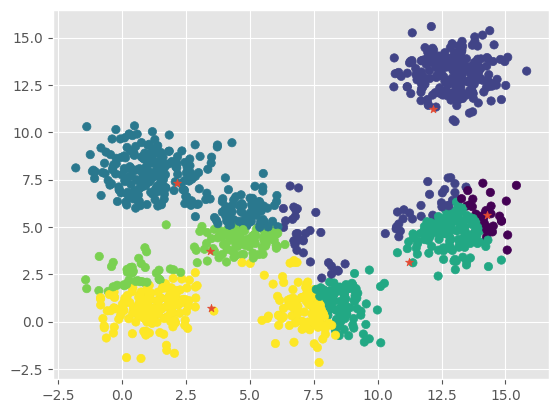

In [197]:
plt.style.use('ggplot')
plt.scatter(data[:,0],data[:,1],c=closest)
plt.scatter(centers[:,0],centers[:,1],marker='*')
plt.show()